# AIRLINE SENTIMENT ANALYSIS

## BUSINESS OVERVIEW

### INTRODUCTION

The airline industry is highly competitive, and customer satisfaction plays a crucial role in determining the success and reputation of airlines. In today's digital age, social media platforms have become a significant avenue for customers to express their opinions and experiences with airlines. The Twitter US Airline Sentiment dataset provides a valuable opportunity for airlines to gain insights into customer sentiments and address their concerns effectively.

### CHALLENGES

1. Flight delays(Unrelated to weather)
2. Poor customer service
3. Mishandling of luggage


### PROPOSED SOLUTION
1. Efficient Schedule Planning: Optimize flight schedules by considering factors such as airport congestion, airspace availability, and historical on-time performance. Utilize advanced algorithms and data analysis to create efficient schedules that minimize the likelihood of delay

2. Hire enough professionally equipped staff to aid in efficient customer service

3. Proper care while handling customer luggage.

> According to forbes, it takes a lot more money (up to five times more) to get new customers than to keep the ones you already have. Churn prediction through sentiment analysis could tells us how many existing customers are leaving the business, so lowering churn will have a big positive impact.

### PROBLEM STATEMENT

The airline industry is currently facing a notable decrease in customer satisfaction, leading to unfavorable brand perception and diminished customer loyalty. This decline in satisfaction can be attributed to several factors, including flight delays, inadequate customer service, mishandling of luggage, and other operational inefficiencies. As a result, addressing these customer concerns and enhancing the overall brand perception has become a crucial focus for airlines.

### OBJECTIVES

1.  Determine the overall sentiment expressed in tweets related to US airlines. This involves classifying tweets as positive, negative, or neutral to understand the general sentiment of customers towards different airlines.
2. Predict the customers who are likely to include US airlines in their futue travels.
3. Grouping different customers based on their sentiments for ease of understanding each customers need.


### SUCCESS METRICS

The final step in evaluating the quality of the model is train_test_split, which gives us an idea of how the model would perform with new data for the same
variables. one that the model will be trained on, and another that it will be tested on. By default, the function takes 75% of the data as the training subset and the other 25% as its test subset. It measures the performance of the model targeting an accuracy of 80%.

## DATA UNDERSTANDING

The data was sourced from [here](https://data.world/socialmediadata/twitter-us-airline-sentiment). It was scraped from February 2015 and contains tweet reviews of different US airline companies.

### Data Preparation

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px 
import re
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
#downloading dependencies
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#creating lemmatizer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# loading the dataset
df = pd.read_csv('Airline-Sentiment-2-w-AA.csv', encoding='latin1')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [3]:
def describe_columns(df):
    # Print column names
    print("Column Names:")
    print(df.columns)

    # Print data types
    print("\nData Types:")
    print(df.dtypes)

    # Print number of rows and columns
    print("\nShape:")
    print(df.shape)

    # Print df information
    print("\nInfo:")
    print(df.info())

    # Print descriptive statistics for numerical columns
    print("\nDescriptive Statistics:")
    print(df.describe())

    # Print missing values count per column
    print("\nMissing Values in percentages:")
    print((df.isna().sum()/len(df)) * 100)

describe_columns(df)

Column Names:
Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'airline_sentiment',
       'airline_sentiment:confidence', 'negativereason',
       'negativereason:confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

Data Types:
_unit_id                          int64
_golden                            bool
_unit_state                      object
_trusted_judgments                int64
_last_judgment_at                object
airline_sentiment                object
airline_sentiment:confidence    float64
negativereason                   object
negativereason:confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     i

The dataset has 14640 rows and 20 columns. It also has missing values, with some column registering aproximately 90%. This will be dealt with at the preprocessing stage. From our data overview, the text column needs preprocessing since it contains raw tweets with underscores and nametags.

In [4]:
# Checking for duplicates
print('Duplicates:')
print(df.duplicated().sum())
print('\n' )
print('Duplicates in Unit id column:')
print(df.duplicated(subset='_unit_id').sum())

Duplicates:
0


Duplicates in Unit id column:
0


### EDA

In [5]:
# distribution of airline sentiments

sentiments = df['airline_sentiment'].value_counts(normalize=True)
sentiments

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

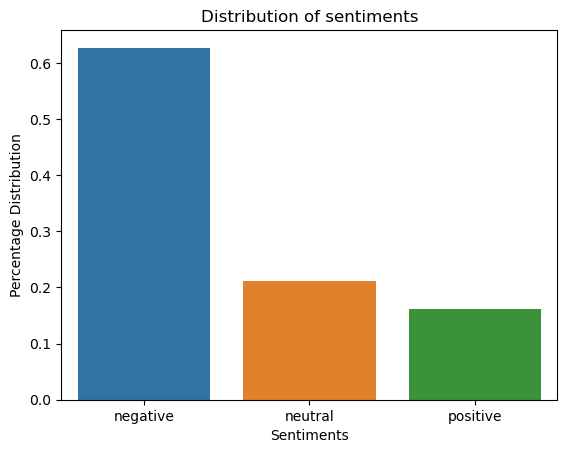

In [6]:
# plot the distribution of sentiments

sns.barplot(x=sentiments.index, y=sentiments.values)
plt.xlabel('Sentiments')
plt.ylabel('Percentage Distribution')
plt.title('Distribution of sentiments');


In [7]:
# distribution of airlines

airlines = df['airline'].value_counts()
airlines

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

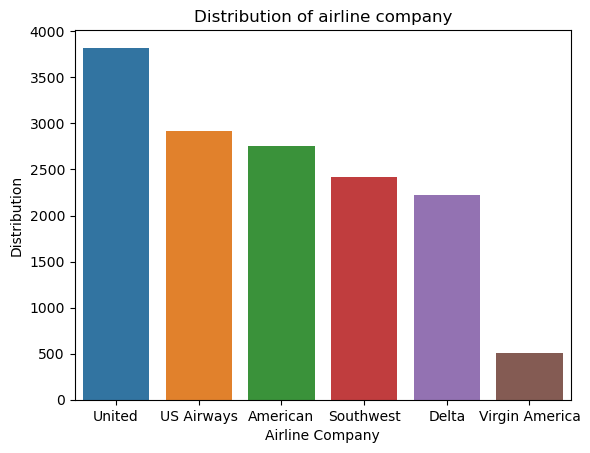

In [8]:
# plot the distribution of airlines

sns.barplot(x=airlines.index, y=airlines.values)
plt.xlabel('Airline Company')
plt.ylabel('Distribution')
plt.title('Distribution of airline company');

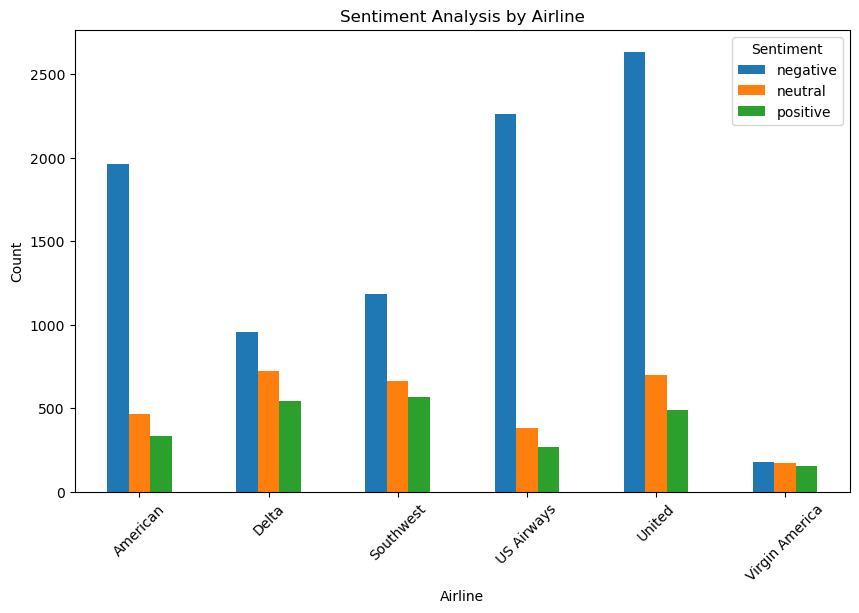

In [9]:
# Group the sentiment by airline
sentiment_by_airline = df.groupby(['airline', 'airline_sentiment']).size().unstack()

# Plot the grouped data
sentiment_by_airline.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Sentiment Analysis by Airline')
plt.legend(title='Sentiment', loc='upper right')
plt.xticks(rotation=45)
plt.show()

From the plot above, United, US Airways and American have skyrocketing number of negative sentiments. Virgin America has an almost evenly distributed 

## Data Preprocessing

### Feature Selection

In [10]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'airline_sentiment',
       'airline_sentiment:confidence', 'negativereason',
       'negativereason:confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [11]:
tweet_df = df[['airline_sentiment', 'text']]
tweet_df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [12]:
def remove_nametags(sentence):
    """A simple function to remove name tags"""
    clean_words = []
    for word in sentence.split():
        if "@" not in word:
            clean_words.append(word)
    return " ".join(clean_words)

tweet_df["text"] = tweet_df["text"].apply(remove_nametags)

In [13]:
tweet_df[:50]

,airline_sentiment,text
0,neutral,What said.
1,positive,plus you've added commercials to the experienc...
2,neutral,I didn't today... Must mean I need to take ano...
3,negative,"it's really aggressive to blast obnoxious ""ent..."
4,negative,and it's a really big bad thing about it
5,negative,seriously would pay $30 a flight for seats tha...
6,positive,"yes, nearly every time I fly VX this ÛÏear wo..."
7,neutral,Really missed a prime opportunity for Men With...
8,positive,"Well, I didn'tÛ_but NOW I DO! :-D"
9,positive,"it was amazing, and arrived an hour early. You..."


In [14]:
# remove numbers
num_pattern = r'[0-9]'
tweet_df['text'] = tweet_df['text'].replace(to_replace=num_pattern, value='', regex=True)
tweet_df[:50]


,airline_sentiment,text
0,neutral,What said.
1,positive,plus you've added commercials to the experienc...
2,neutral,I didn't today... Must mean I need to take ano...
3,negative,"it's really aggressive to blast obnoxious ""ent..."
4,negative,and it's a really big bad thing about it
5,negative,seriously would pay $ a flight for seats that ...
6,positive,"yes, nearly every time I fly VX this ÛÏear wo..."
7,neutral,Really missed a prime opportunity for Men With...
8,positive,"Well, I didn'tÛ_but NOW I DO! :-D"
9,positive,"it was amazing, and arrived an hour early. You..."


In [15]:
# remove punctuations
import string
tweet_df['text'] = tweet_df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
# change to lowercase
tweet_df['text'] = tweet_df['text'].apply(lambda x: x.lower())
tweet_df[:50]


,airline_sentiment,text
0,neutral,what said
1,positive,plus youve added commercials to the experience...
2,neutral,i didnt today must mean i need to take another...
3,negative,its really aggressive to blast obnoxious enter...
4,negative,and its a really big bad thing about it
5,negative,seriously would pay a flight for seats that d...
6,positive,yes nearly every time i fly vx this ûïear wor...
7,neutral,really missed a prime opportunity for men with...
8,positive,well i didntûbut now i do d
9,positive,it was amazing and arrived an hour early youre...


In [16]:
#remove emoticons
def remove_emojis(data):
    """A simple function to remove all emojis"""
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002500-\U00002BEF"
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642" 
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"
                           u"\u3030"
                           "]+", re.UNICODE)
    return re.sub(emoji_pattern, "", data)

tweet_df["text"] = tweet_df["text"].apply(remove_emojis)


In [17]:
def remove_non_standard_char(review):
    """A simple function to remove characters outside the ASCII range"""
    pattern = re.compile(r"[^\x00-\x7F]+")
    clean_string = re.sub(pattern, "", review)
    return clean_string

tweet_df["text"] = tweet_df["text"].apply(remove_non_standard_char)

In [18]:
tweet_df[:50]

,airline_sentiment,text
0,neutral,what said
1,positive,plus youve added commercials to the experience...
2,neutral,i didnt today must mean i need to take another...
3,negative,its really aggressive to blast obnoxious enter...
4,negative,and its a really big bad thing about it
5,negative,seriously would pay a flight for seats that d...
6,positive,yes nearly every time i fly vx this ear worm w...
7,neutral,really missed a prime opportunity for men with...
8,positive,well i didntbut now i do d
9,positive,it was amazing and arrived an hour early youre...


In [19]:
# remove http tags
urlpattern = r'(?:http)s?\S+'
tweet_df['text'] = tweet_df['text'].str.replace(urlpattern, '')
tweet_df[-50:]

,airline_sentiment,text
14590,positive,thank you for quick responses aa usually has f...
14591,negative,what are my chances of making a connection to ...
14592,negative,beyond frustrated with no call back from auto ...
14593,negative,ahhhh your silence is golden now this tops it ...
14594,negative,hey aa can you help with an itinerary for a p...
14595,negative,wheres my dm wheres my voucher whos paying my ...
14596,negative,weve been on hold for hours
14597,negative,do you dislike delays when theyre caused by yo...
14598,neutral,can you guys help me please
14599,negative,its not the weather its also gross incompetenc...


In [20]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
include_stopwords = ["wouldn", "won", "weren", "wasn", "shouldn", "shan", "needn", "mustn",
                     "mightn", "isn", "haven", "hasn", "hadn", "doesn", "didn", "couldn",
                     "aren", "ain", "don", "not"]
stop_words = list(stop_words - set(include_stopwords)) + ['would']




In [21]:
def remove_stopwords(words):
    clean_words = []
    for word in words.split():
        if word not in stop_words:
            clean_words.append(word)
    return " ".join(clean_words)

In [22]:
tweet_df['text'] = tweet_df['text'].apply(remove_stopwords)
tweet_df[:50]

,airline_sentiment,text
0,neutral,said
1,positive,plus youve added commercials experience tacky
2,neutral,didnt today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainmen...
4,negative,really big bad thing
5,negative,seriously pay flight seats didnt playing reall...
6,positive,yes nearly every time fly vx ear worm wont go ...
7,neutral,really missed prime opportunity men without ha...
8,positive,well didntbut
9,positive,amazing arrived hour early youre good


In [29]:
# from nltk.stem import SnowballStemmer
# stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()
def lemmatize_words(review):
    lem_words = []
    for word in review.split():
        lem_word = lemmatizer.lemmatize(word)
        lem_words.append(lem_word)
    return " ".join(lem_words)

tweet_df["text"] = tweet_df["text"].apply(lemmatize_words)

In [ ]:
#tokenizing
from nltk import word_tokenize
x_train=[]
for text in xtrain:
    x_train.append(word_tokenize(text))
x_test=[]
for text in xtest:
    x_test.append(word_tokenize(text))

In [ ]:
#sample after tokenization
x_train[8]